### Project Imports

In [1]:
import cv2
import os
import numpy as np
import time 
import matplotlib.pyplot as plt
%matplotlib inline

import helper
from detectors import OpenCvDetector
from detectors import OPEN_CV_DETECTOR_CONFIG

### Project Config

In [2]:
# configurate open cv detector
# detector architectures source: https://github.com/opencv/opencv/tree/master/data/haarcascades
OPEN_CV_DETECTOR_CONFIG.FACE_DETECTOR_FILE_PATH = os.path.join(".", "detector_architectures",
                                                               "haarcascade_frontalface_default.xml")
OPEN_CV_DETECTOR_CONFIG.EYE_DETECTOR_FILE_PATH = os.path.join(".", "detector_architectures",
                                                              "haarcascade_frontalface_default.xml")

In [3]:
# Set up Open Cv Detector(used for face detection)
open_cv_detector = OpenCvDetector(OPEN_CV_DETECTOR_CONFIG) 

### Face Detection

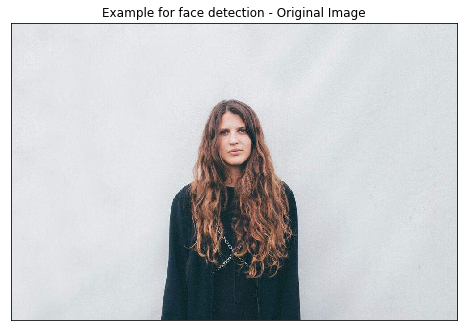

In [4]:
# Example for face detection
test_image = cv2.imread(os.path.join(".", "example_images", "oathbreaker.jpg"))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
helper.show_image(test_image, figsize=(8,8), title="Example for face detection - Original Image")

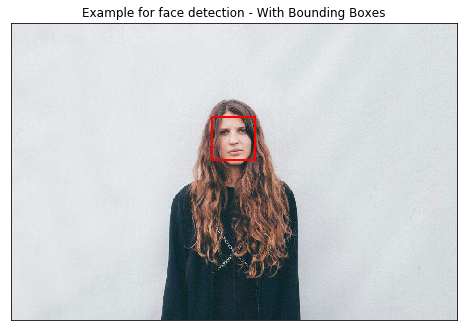

In [5]:
# run face detection
faces = open_cv_detector.detect_faces(test_image, scale_factor=1.25, min_neighbors=6)
helper.show_bounding_boxes(test_image, (faces,), figsize=(8,8), 
                           title="Example for face detection - With Bounding Boxes")

In [6]:
# run face detection in video stream 
helper.cam_stream_manipulation(open_cv_detector, scale_factor=1.15, min_neighbors=6, 
                               manipulation_func=helper.add_bounding_boxes)

### Face Anonymisation

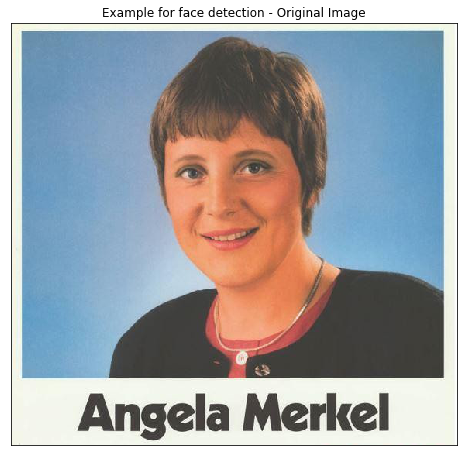

In [7]:
# Example for face anonymizer
test_image = cv2.imread(os.path.join(".", "example_images", "merkel.jpg"))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
helper.show_image(test_image, figsize=(8,8), title="Example for face detection - Original Image")

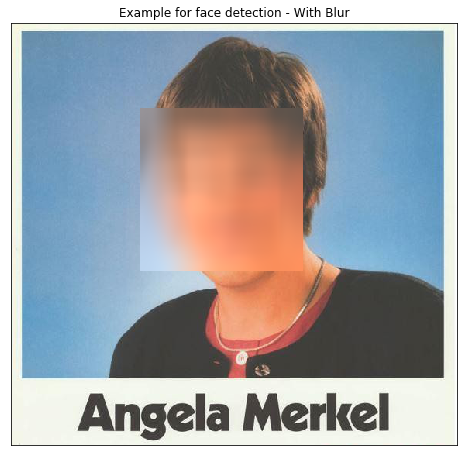

In [8]:
# run face anonymisation
faces = open_cv_detector.detect_faces(test_image, scale_factor=1.25, min_neighbors=6)
helper.show_blur_image(test_image, (faces,), figsize=(8,8), title="Example for face detection - With Blur")

In [9]:
# run face anonymisation in video stream 
helper.cam_stream_manipulation(open_cv_detector, scale_factor=1.15, min_neighbors=6, 
                               manipulation_func=helper.add_blur_to_detections)